In [16]:
import json
from tqdm import tqdm
from pathlib import Path
import lmdb
import re
import six
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
ROOT_DIR = Path.cwd().parents[2]
EXP_NAME = Path.cwd().stem
RAW_LMDB_DIR = ROOT_DIR / 'data' / 'data0001' / 'lmdb'
SAVE_LMDB_DIR = ROOT_DIR / 'data' / EXP_NAME / 'lmdb'
# SAVE_LMDB_DIR.mkdir()

raw_env = lmdb.open(str(RAW_LMDB_DIR), max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)


with raw_env.begin(write=False) as txn:
    n_samples = int(txn.get('num-samples'.encode()))

# save_env = lmdb.open(str(SAVE_LMDB_DIR), map_size=int(4e+9))

count = 0

for i in range(n_samples):
    i += 1

    with raw_env.begin(write=False) as txn:
        # image
        img_key = f'image-{str(i).zfill(8)}'.encode()
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')
        
        # json
        label_key = f'label-{str(i).zfill(8)}'.encode()
        label = txn.get(label_key).decode('utf-8')
        json_dict = json.loads(label)
        if i == 2:
            break

        # for text_dict in json_dict['text']:
            

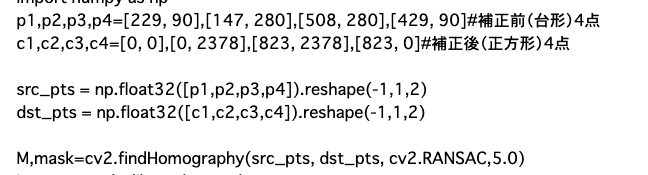

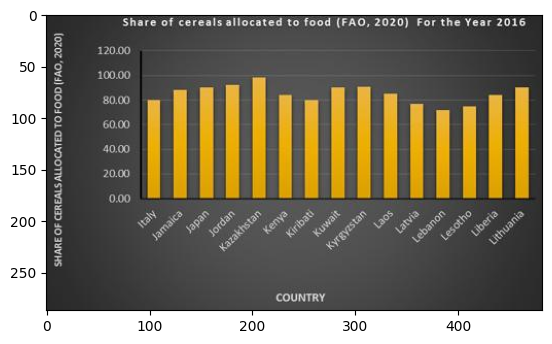

In [9]:
plt.imshow(img)

In [13]:
for text_dict in json_dict['text']:
    polygon = text_dict['polygon']
    text = text_dict['text']

In [12]:
polygon

{'x0': 427,
 'x1': 459,
 'x2': 466,
 'x3': 435,
 'y0': 218,
 'y1': 186,
 'y2': 194,
 'y3': 225}

In [17]:
draw_img = img.copy()
x1, y1, x2, y2, x3, y3, x4, y4 = polygon
cnt = np.array([[[x1, y1]],
            [[x2, y2]],
            [[x3, y3]],
            [[x4, y4]]
            ])

In [24]:
cv2.drawContours(np.array(draw_img), cnt, 0, (0, 0, 255), 2)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


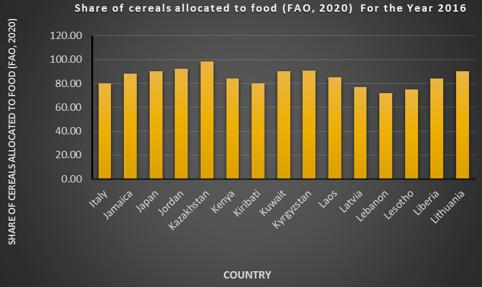

In [23]:
draw_img